In [1]:
import pandas as pd

In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [1]:
import yfinance as yf
import datetime as dt

In [2]:
start = dt.datetime(2021,9,1)
end = dt.datetime(2022,2,4)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (107, 1)


In [7]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [5]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    print("******************")

RMSE-Testset: 0.11225493201131523
maPe-Testset: 10231789911058.781
******************
RMSE-Testset: 0.11172455254444083
maPe-Testset: 10348601094196.201
******************
RMSE-Testset: 0.13819353141793347
maPe-Testset: 7064362647165.49
******************
RMSE-Testset: 0.11653072480470557
maPe-Testset: 9884321555665.877
******************


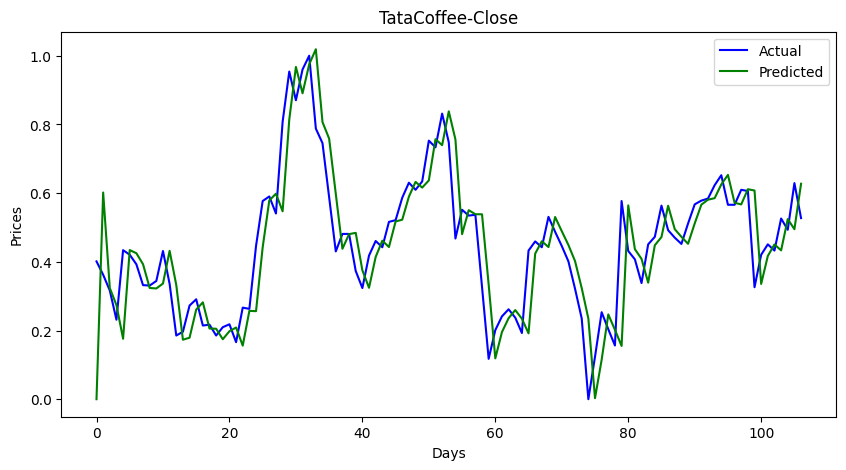

In [6]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [7]:
len(data1)

107

In [8]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [9]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

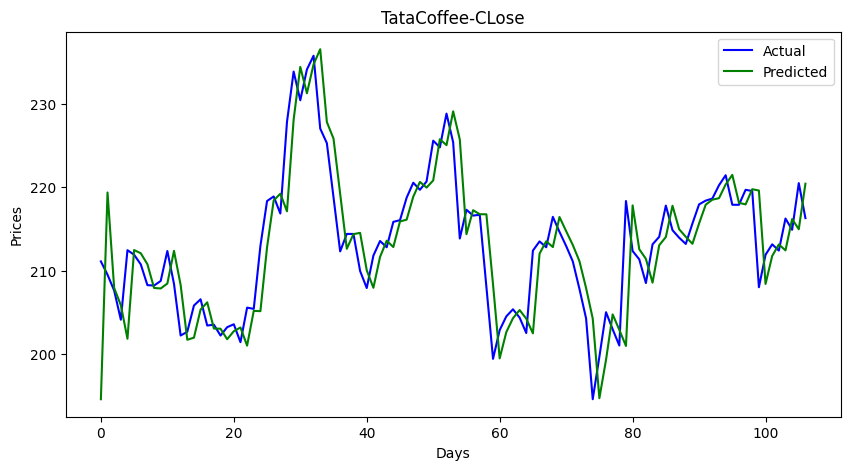

In [10]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [11]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 4.806892398194106
maPe-Testset: 0.015946166340266486


In [12]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [13]:
forecast

array([0.53131124, 0.53341909, 0.53372565, 0.53596132])

In [14]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [17]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [33]:
forecast_stock_price_test_oriF

,Closefore
0,216.466592
1,216.55354
2,216.566186
3,216.658407
